In [74]:
import fastai
from fastai.vision.all import *
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
watches_path = '../all_watches/'

In [3]:
files_names = get_image_files(watches_path)
def label_func(file_name):
    return file_name.name.split('-')[0] 

In [4]:
item_tfms = Resize(400, ResizeMethod.Squish)
batch_tfms = [*aug_transforms(size=380,
                              do_flip=False,
                              max_rotate=30.0,
                              max_warp=0.05
                             ), 
              Normalize.from_stats(*imagenet_stats)]

bs=16

In [5]:
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   get_y=label_func,
                   splitter = RandomSplitter(valid_pct=0.2, seed=513),
                   item_tfms=item_tfms,
                   batch_tfms=batch_tfms)

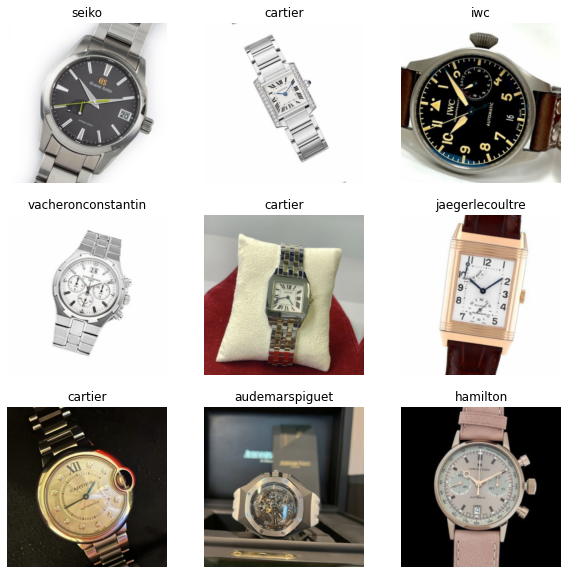

In [6]:
dls = dblock.dataloaders(watches_path, bs=bs)
dls.show_batch(max_n=9, figsize=(10,10))


In [7]:
dls.vocab.o2i

{'audemarspiguet': 0,
 'cartier': 1,
 'hamilton': 2,
 'iwc': 3,
 'jaegerlecoultre': 4,
 'longines': 5,
 'omega': 6,
 'oris': 7,
 'patekphilippe': 8,
 'richardmille': 9,
 'rolex': 10,
 'seiko': 11,
 'tagheuer': 12,
 'tudor': 13,
 'vacheronconstantin': 14}

In [8]:
print('Class count:', dls.c)
print('Training Images: ', len(dls.train_ds))
print('Validation Images: ',len(dls.valid_ds))

Class count: 15
Training Images:  3628
Validation Images:  907


In [10]:
learner = vision_learner(dls, resnet50, metrics=error_rate)
learner.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,2.380197,1.661945,0.481808,01:20
1,1.690152,1.334920,0.368247,01:20
2,1.353266,1.088658,0.328556,01:20
3,1.050950,0.924341,0.286659,01:21
4,0.836496,0.824409,0.255788,01:21
5,0.610389,0.774464,0.229327,01:21
6,0.456548,0.760784,0.233738,01:21
7,0.414069,0.750786,0.237045,01:21


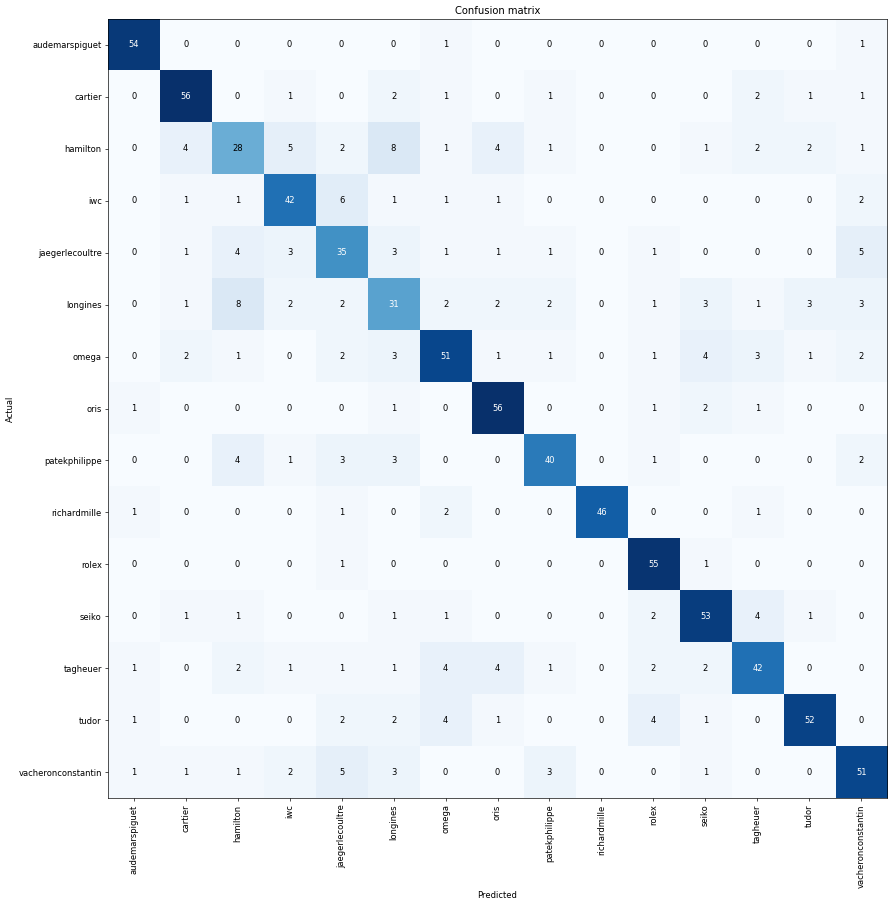

In [12]:
interp = ClassificationInterpretation.from_learner(learner)
losses,idxs = interp.top_losses()
interp.plot_confusion_matrix(figsize=(15,15), dpi=60)


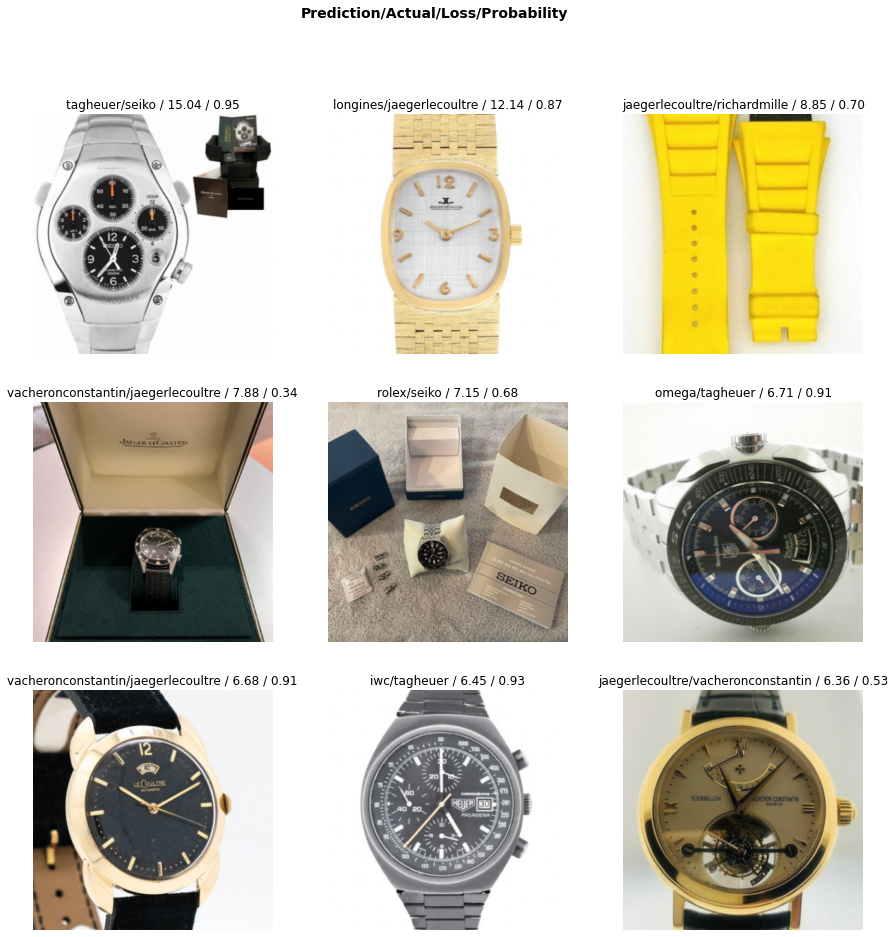

In [13]:
interp.plot_top_losses(9, figsize=(15,15))


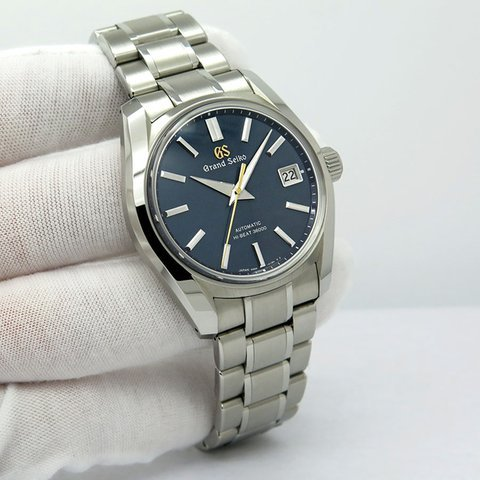

In [20]:
dls.valid_ds[120][0]

In [21]:
learner.predict(dls.valid_ds[120][0])

('seiko',
 TensorBase(11),
 TensorBase([1.0520e-06, 4.1080e-06, 1.6600e-06, 4.7517e-06, 3.6679e-06, 2.0517e-06, 5.9328e-05, 1.2940e-06, 5.6036e-06, 4.1402e-06, 1.2460e-05, 9.9965e-01, 4.5075e-05, 4.8595e-05, 1.5219e-04]))

In [22]:
learner.save('watch-classifierv1')

Path('models/watch-classifierv1.pth')

SuggestedLRs(valley=1.4454397387453355e-05)

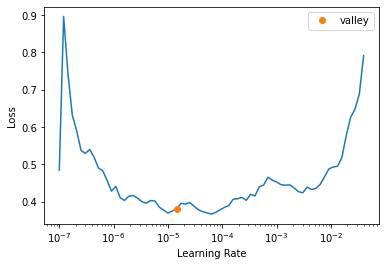

In [24]:
learner.lr_find()

In [25]:
learner.unfreeze()

In [28]:
learner.fit_one_cycle(8, lr_max=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.399974,0.738223,0.222712,01:48
1,0.364386,0.715044,0.207277,01:49
2,0.289651,0.694924,0.210584,01:50
3,0.303078,0.663702,0.194046,01:50
4,0.233238,0.660047,0.191841,01:50
5,0.182984,0.646248,0.188534,01:50
6,0.199312,0.651954,0.195149,01:51
7,0.151915,0.656863,0.200662,01:50


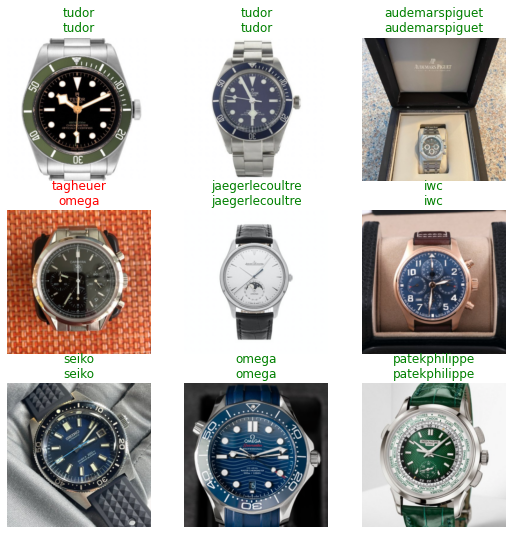

In [29]:
learner.show_results()

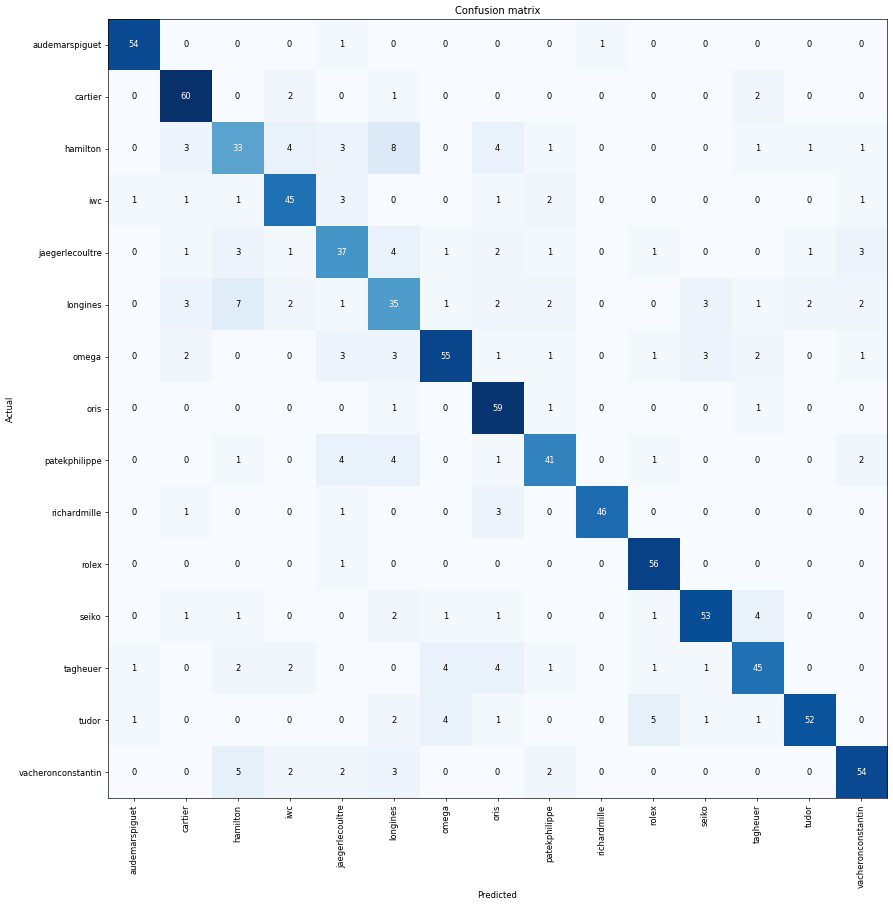

In [30]:
interp = ClassificationInterpretation.from_learner(learner)
losses,idxs = interp.top_losses()
interp.plot_confusion_matrix(figsize=(15,15), dpi=60)

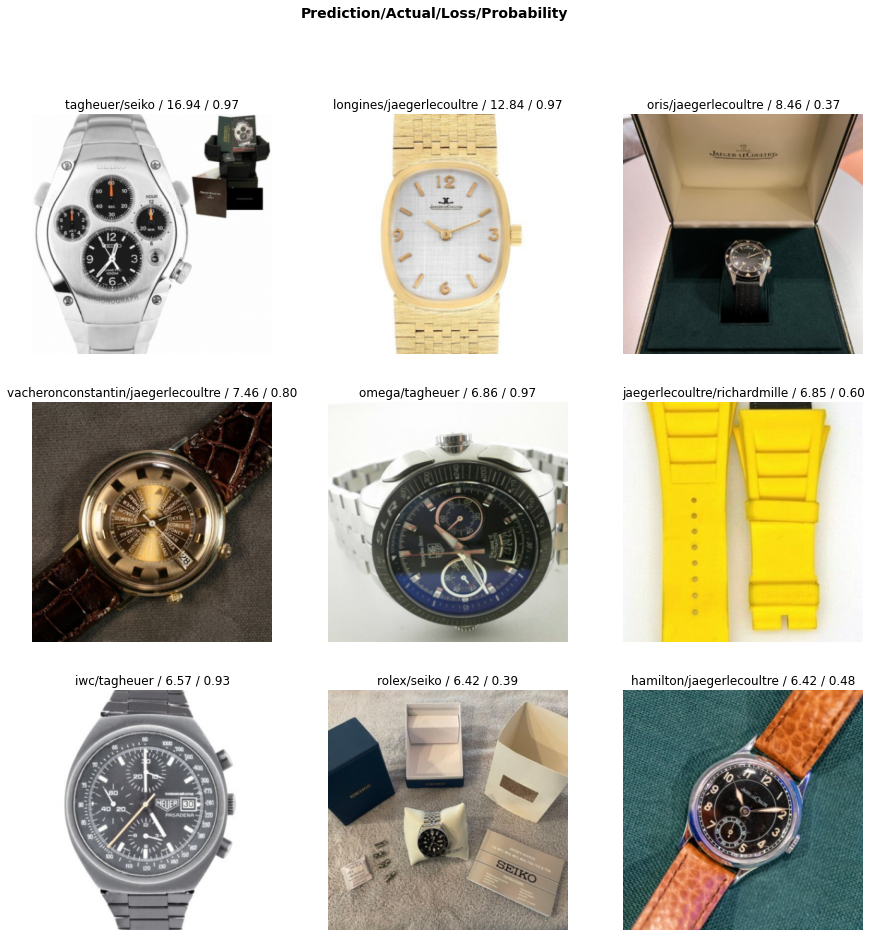

In [31]:
interp.plot_top_losses(9, figsize=(15,15))

In [32]:
learner.save('watch-classifierv2')

Path('models/watch-classifierv2.pth')

In [33]:
learner.export('watch-classifier.pkl')